To run this notebook you need to have several packages installed. One way to install in through Anaconda with the following:
`conda update conda`<br>
`conda config --add channels conda-forge`<br>
`conda create -n jack rios jupyter jupyterlab scipy matplotlib numba pyproj rios::pynninterp`<br>
`conda activate jack`<br>
`pip install laspy[laszip]`

You can work with the las data two ways:
1. Use the las2rec function to read the data into a recArray.
2. Access the point directly using laspy, such as las.x or las.y

In [1]:
import os
import sys
import laspy
import numpy as np
import matplotlib.pyplot as plt
from pyproj import crs

In [12]:
def las2rec(infile):
    """
    Function to read in a laz file and return as a recArray.
    """
    with laspy.open(infile) as fh:
        las = fh.read()
    las_data = np.rec.fromarrays([las.return_num, las.num_returns, las.gps_time, las.intensity,las.classification, las.x, las.y, las.z],
                                 names=['RETURN_NUMBER', 'NUMBER_OF_RETURNS', 'TIMESTAMP', 'INTENSITY', 'CLASSIFICATION', 'X', 'Y', 'Z'],
                                 formats=['u1', 'u1', '<f8', '<i4', 'u1', '<f8', '<f8', '<f8'])
    las_data = las_data[np.argsort(las_data['TIMESTAMP'])]
    return las_data

# Read data from las file into recArray 
lasFile = r'E:\lidar_for_jack\katoomba_201804_lid1\260000_6244000_Katoomba201804-LID1-C3-AHD_z56.las'
lasData = las2rec(lasFile)

In [13]:
# Print out the bounding box
print('min and max X: %f %f'%(np.min(lasData['X']), np.max(lasData['X'])))
print('min and max Y: %f %f'%(np.min(lasData['Y']), np.max(lasData['Y'])))
print('min and max Z: %f %f'%(np.min(lasData['Z']), np.max(lasData['Z'])))

min and max X: 260000.000000 262000.000000
min and max Y: 6244000.000000 6246000.000000
min and max Z: 272.747000 661.417000


In [14]:
def plotReturnNumberCount(las_data):
    """
    Function to make a histogram of return numbers from a las recArray.
    """
    returnNumbers = las_data['RETURN_NUMBER']
    returnNumberList = np.unique(returnNumbers)
    count = []
    for n in returnNumberList:
        count.append(np.sum(returnNumbers == n))
    fig = plt.figure(1)
    fig.set_size_inches((8, 2))
    ax = plt.axes([0.2, 0.75, 0.2, 0.75])  
    ax.bar(returnNumberList, count)
    ax.set_xlabel('Return numbers')
    ax.set_ylabel('Count')
    ax.set_xticks(returnNumberList)
    ax.ticklabel_format(style='plain')
    plt.show()

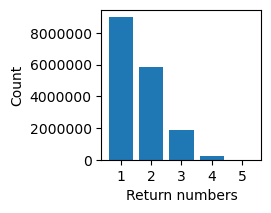

In [15]:
# Make a plot of return numbers from lasFile
plotReturnNumberCount(lasData)

In [17]:
# Select a 100 m square subset and export to a new laz file
lasFile = r'E:\lidar_for_jack\katoomba_201804_lid1\260000_6244000_Katoomba201804-LID1-C3-AHD_z56.las'
outFile = r'E:\lidar_for_jack\katoomba_201804_lid1\test.laz'
epsg = 28355

#min and max X: 260000.000000 262000.000000
#min and max Y: 6244000.000000 6246000.000000

minX = 261000
maxX = 261100
minY = 6245000
maxY = 6245100

las = laspy.read(lasFile)
subset = laspy.create(point_format=las.header.point_format, file_version=las.header.version)
subset.points = las.points[(las.x >= minX) & (las.x <= maxX) & (las.y >= minY) & (las.y <= maxY)]
subset.header.scales = las.header.scales
subset.header.offset = las.header.offset
subset.header.add_crs(crs.CRS.from_user_input(epsg))
subset.write(outFile)

# Check the new file
print('min and max X: %f %f'%(np.min(subset.points.x), np.max(subset.points.x)))
print('min and max Y: %f %f'%(np.min(subset.points.y), np.max(subset.points.y)))
print('min and max Z: %f %f'%(np.min(subset.points.z), np.max(subset.points.z)))

min and max X: 261000.000000 261100.000000
min and max Y: 6245000.000000 6245100.000000
min and max Z: 572.384000 647.107000
